# Course #6 The complete Data Visualization Course, Excel, Tableau, Python, and R.

## A.- Practice Exam 4 Template
- Charts and Data Types:
    1. Numerical & Categorical -> Bar charts and Pie charts.
    2. Numerical & Numerical -> Scatter plot and Regression scatter chart.
    3. Time Series -> Stacked Area charts and Line charts
- Colors:
    1. Predetermined: Company colors. Clients request specific colors.
    2. Online tools: Create your own custom palette with the aid of online tools (coolors.co).
    3. Color palettes of this course.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()          # set default plots theme, alias for .set_theme()
sns.set_theme()     # set aspects of the visual theme for all matplotlib and seaborn plots

## 6.- Line chart

### 6.- Line chart - Theory
- Up to several categories.
- Time series data.
- y-axis doesn't have to start at 0.
- When you have a long period of time, narrow it down to gain more insight.
- Be careful no to include too many categories to avoid a spaghetti chart.

In [2]:
# Import/read the data
df_line = pd.read_csv('6_returns1020.csv')
df_line

,Date,GSPCRet,FTSERet
0,1/1/2010,0.000000,0.000000
1,1/4/2010,-0.008912,0.000000
2,1/5/2010,0.014419,0.016147
3,1/6/2010,0.002693,0.004036
4,1/7/2010,0.000493,0.001358
...,...,...,...
2626,1/27/2020,-0.025784,0.010429
2627,1/28/2020,0.002522,-0.022924
2628,1/29/2020,0.010478,0.009255
2629,1/30/2020,-0.010035,0.000388


In [3]:
# Check columns type, particularly Date col
print(df_line.info())
df_line.Date.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2631 non-null   object 
 1   GSPCRet  2631 non-null   float64
 2   FTSERet  2631 non-null   float64
dtypes: float64(2), object(1)
memory usage: 61.8+ KB
None


dtype('O')

In [4]:
# Make a datetime column
df_line['dt_date'] = pd.to_datetime(df_line['Date'])
display(df_line.iloc[[0, 4, 9, -9, -5, -1]])
df_line.dtypes


,Date,GSPCRet,FTSERet,dt_date
0,1/1/2010,0.000000,0.000000,2010-01-01
4,1/7/2010,0.000493,0.001358,2010-01-07
9,1/14/2010,0.007359,-0.004583,2010-01-14
2622,1/21/2020,-0.000791,-0.003023,2020-01-21
2626,1/27/2020,-0.025784,0.010429,2020-01-27
2630,1/31/2020,0.007947,-0.013576,2020-01-31


Date               object
GSPCRet           float64
FTSERet           float64
dt_date    datetime64[ns]
dtype: object

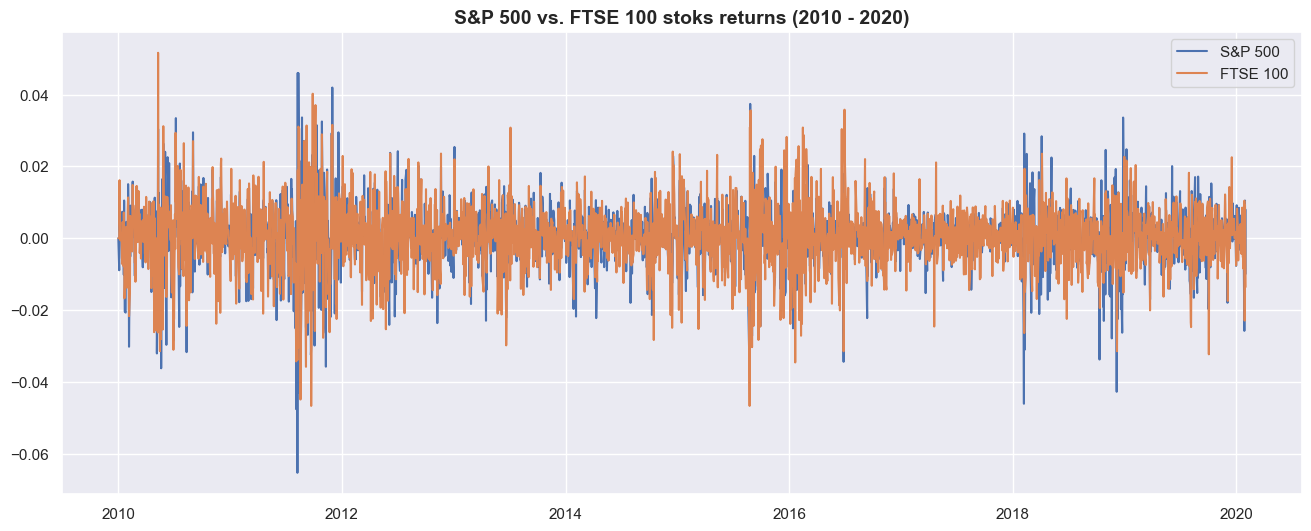

In [5]:
# Line plot for the WHOLE period
plt.figure(figsize=(16, 6))

plt.plot(df_line['dt_date'], df_line['GSPCRet'])
plt.plot(df_line['dt_date'], df_line['FTSERet'])

plt.title('S&P 500 vs. FTSE 100 stoks returns (2010 - 2020)',
          fontdict={'size': 14, 'weight': 'bold'})
plt.legend(['S&P 500', 'FTSE 100'])

plt.show()

### 6.- Line Chart - Function to show a desire period

In [6]:
def lc_period(start, end):
    df_line_period = df_line[(df_line['dt_date'] >= start) & (df_line['dt_date'] <= end)]
    plt.figure(figsize=(16, 6))
    plt.plot(df_line_period['dt_date'], df_line_period['GSPCRet'], color='midnightblue')
    plt.plot(df_line_period['dt_date'], df_line_period['FTSERet'], color='crimson')
    plt.title(f'S&P 500 vs. FTSE 100 stocks returns ({start} - {end})')
    plt.legend(['S&P 500', 'FTSE 100'])
    plt.show()

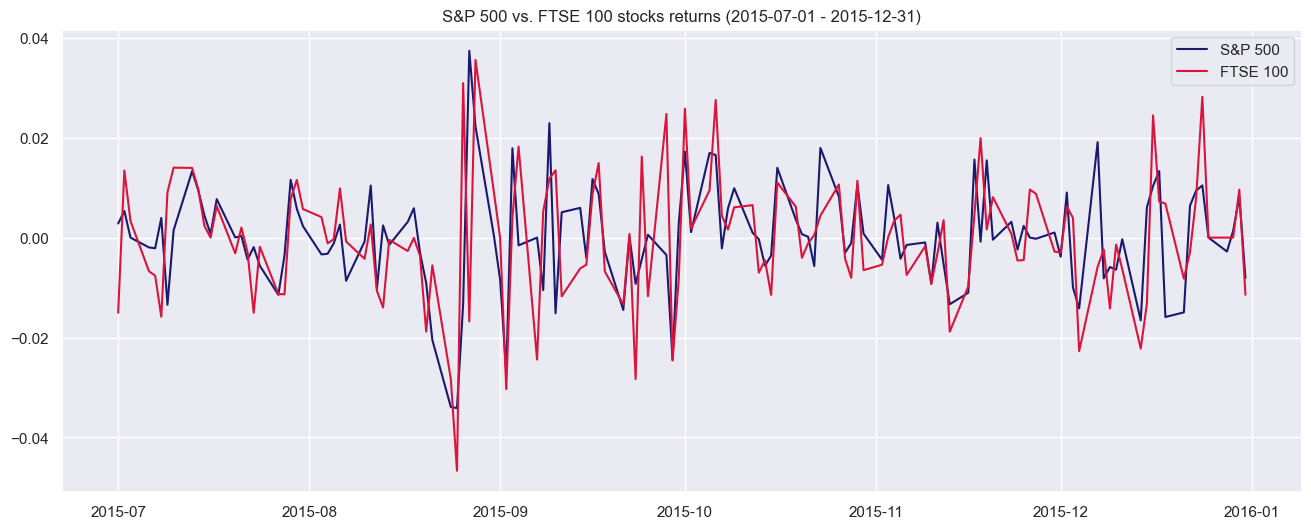

In [7]:
lc_period('2015-07-01', '2015-12-31')

## 7.- Histogram

### 7.- Histogram - Theory
- Distribution of a numeric variable (sometimes categorical).
- The variable's range of values is split into intervals or bins.
- y-axis: number of observations within each interval (or density).
- Similar to a bar chart, no gaps between bins.
- To create a histogram: Determine the interval size or choose the number of bins.
- Choosing the number of bins (critical):
    1. Start with a very large number to observe the data pattern.
    2. Reduce drastically the number of bins.
    3. Choose several bins, such that the pattern in the data is visible.
> There are scientific approaches, not used because real data has noise, is discrete, ex. Scott's Rule, Sturge's Rule, Doane's Rule.

In [8]:
# import/read data
df_real_estate = pd.read_csv('7_histogram_data.csv')
df_real_estate.iloc[[0, 9, -9, -1]]         # Equiv to df[[0, 9, -9, -1], :

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
9,4023,4,2006.0,3.0,Apartment,23,794.52,236
258,5037,5,NaN,NaN,Apartment,37,606.33,147
266,5051,5,NaN,NaN,Apartment,51,789.25,199


``` Python
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
```

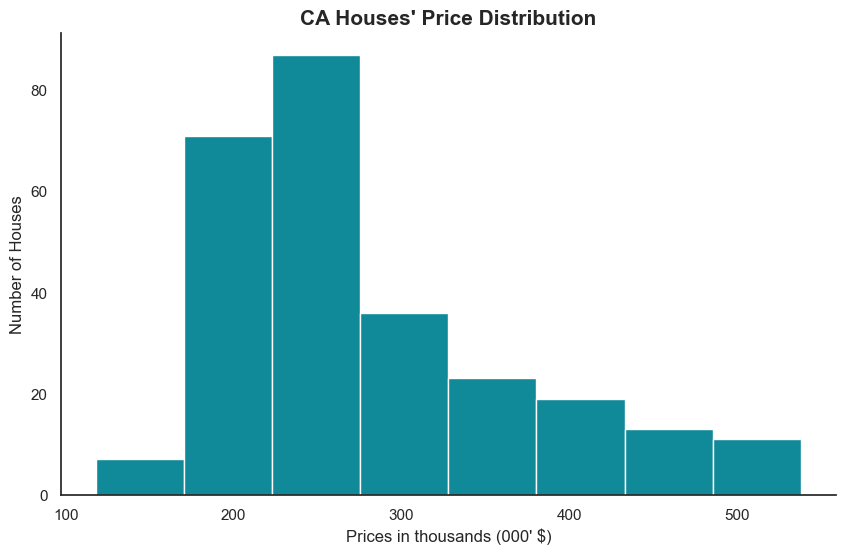

In [9]:
xy_size = 13
sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.hist(df_real_estate.Price, bins=8, color='#108A99') # density=True)
plt.title("CA Houses' Price Distribution", fontsize=xy_size + 2,  fontweight='bold')
plt.xlabel("Prices in thousands (000' $)")
plt.ylabel("Number of Houses")
sns.despine()
plt.show()


## 8.- Scatter Plot

### 8.- Scatter Plot Theory
- Displays each point from the data, instead of showing aggregated form.
- Show relationship between variables (numerical vars -jm).
- Use transparency to avoid over-plotting.
- A third variable could be use with a color parameter.

In [10]:
#import/read the data
df_scatter = pd.read_csv('7_histogram_data.csv')
df_scatter.iloc[[0, 9, -9, -1]]

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
9,4023,4,2006.0,3.0,Apartment,23,794.52,236
258,5037,5,NaN,NaN,Apartment,37,606.33,147
266,5051,5,NaN,NaN,Apartment,51,789.25,199


### 8.Matplotlib scatter()

<bound method PathCollection.legend_elements of <matplotlib.collections.PathCollection object at 0x0000028ACE294690>> <class 'method'>
([<matplotlib.lines.Line2D object at 0x0000028ACB5A27D0>, <matplotlib.lines.Line2D object at 0x0000028ACB5A2190>, <matplotlib.lines.Line2D object at 0x0000028ACB5A1AD0>, <matplotlib.lines.Line2D object at 0x0000028ACB5A1410>, <matplotlib.lines.Line2D object at 0x0000028ACB5A0D50>], ['$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$', '$\\mathdefault{4}$', '$\\mathdefault{5}$']) <class 'tuple'>


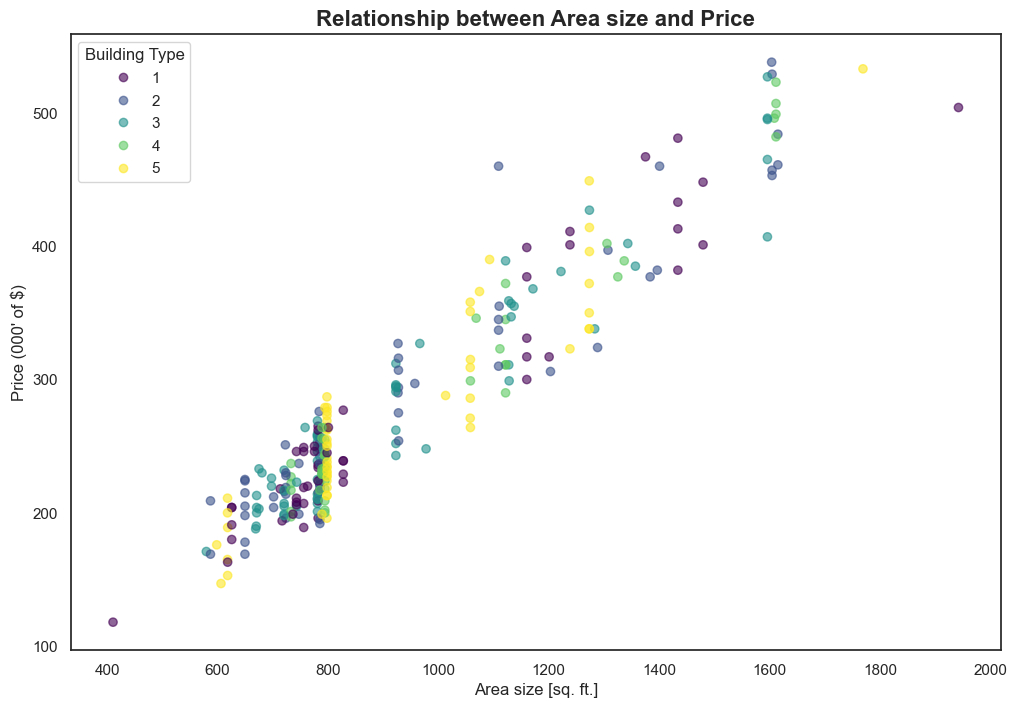

In [11]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df_scatter['Area (ft.)'],       # x-axis (var 1)
                      df_scatter['Price'],            # y-axis (var 2)
                      alpha=0.6,                        # Transparency
                      c=df_scatter['Building Type'],  # Third var colored
                      cmap='viridis')                   # Palette

plt.legend(*scatter.legend_elements(),      # * means unpacking
           loc='upper left',
           title='Building Type')
# jm - test
print(scatter.legend_elements, type(scatter.legend_elements))
print(scatter.legend_elements(), type(scatter.legend_elements()))

plt.title('Relationship between Area size and Price',
          fontsize=16, fontweight='bold')
plt.xlabel('Area size [sq. ft.]')
plt.ylabel("Price (000' of $)")
plt.show()


### 8.Seaborn Scatter

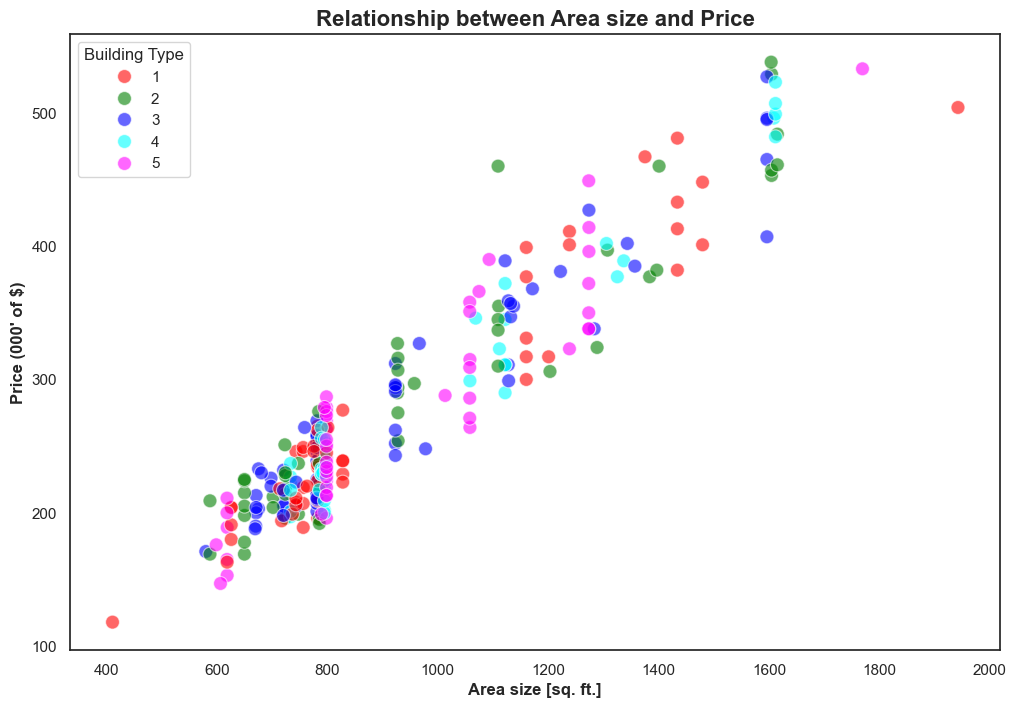

In [12]:
plt.figure(figsize=(12, 8))
building_type_clrs = ['red', 'green', 'blue', 'cyan', 'magenta']

sns.scatterplot(x=df_scatter['Area (ft.)'],       # x-axis (var 1)
                y=df_scatter['Price'],            # y-axis (var 2)
                alpha=0.6,                          # Transparency
                hue=df_scatter['Building Type'],  # Third var colored
                palette=building_type_clrs,         # Palette
                s=100)                              # Size of each point

plt.title('Relationship between Area size and Price',
          fontsize=16, fontweight='bold')
plt.xlabel('Area size [sq. ft.]', fontweight='bold')
plt.ylabel("Price (000' of $)", fontweight='bold')
plt.show()


## 9.- Combo Plots Part 1 - Regression Plot

### 9.- Regression _scatter_ plot - Theory
- Used to determine relationships between predictor(s) and outcome.
- Regression Line & Equation help is quantify the relationship.
- There exist many type of relationships between vadiables (lineal, exponential, logarithmic, polynomial).
- Sometimes there is no apparent relationship between features.

In [13]:
# Import/read data
df_regression = pd.read_csv('9_scatter_plot_ii.csv')
df_regression

,Budget,Sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


### 9.Seaborn regpplot() - short for regression plot
- Both regplot() and lmplot() add by default a 95% confidence interval: a gray area around the regression line.
- regplot() accepts a variety of formats for the X an Y variables, such as numpy arrays, pandas series, etc.

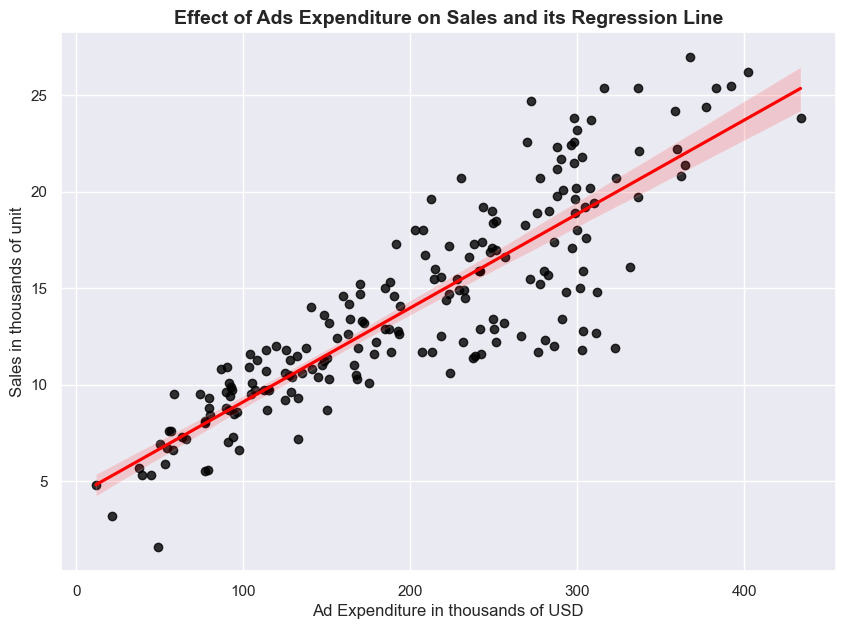

In [14]:
#plt.figure(figsize=(12, 8))
sns.set(rc={'figure.figsize': (10, 7)}) # sns.set funct. w/rc parameter and figure.figsize key and value

sns.regplot(x='Budget',
            y='Sales',
            data=df_regression,
            #color='green'  # color for all the chart
            scatter_kws={'color': 'black'},
            line_kws={'color': 'red'})

plt.xlabel('Ad Expenditure in thousands of USD')
plt.ylabel('Sales in thousands of unit')
plt.title('Effect of Ads Expenditure on Sales and its Regression Line',
          fontdict={'size': 14, 'weight': 'bold'})
plt.show()

### 9.Seaborn lmplot() - short for Lineal Model
- lmplot() can only support X and Y in the form of strings also known as 'long form' or 'tidy' data.
- lmplot() support a wider range of features (parameters?)
- https://seaborn.pydata.org/tutorial/regression.html
- https://seaborn.pydata.org/tutorial.html

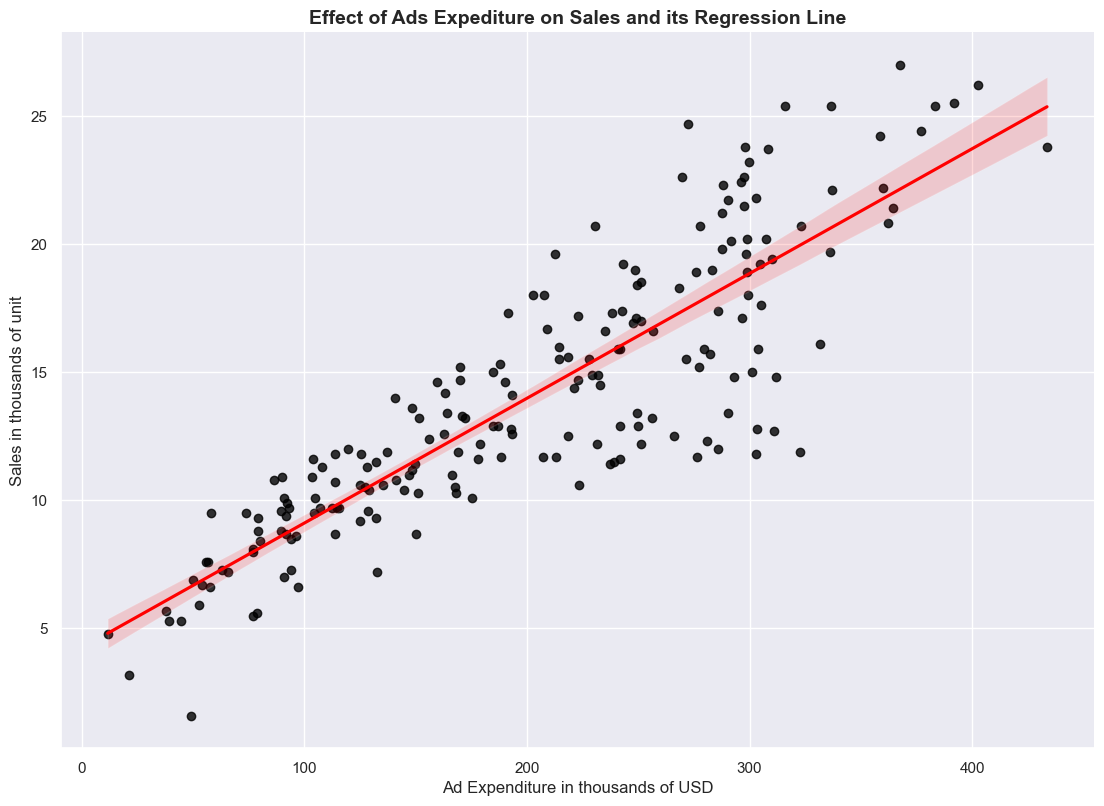

In [15]:

sns.lmplot(x='Budget',
            y='Sales',
            data=df_regression,
            scatter_kws={'color': 'black'},
            line_kws={'color': 'red'},
            height=8, aspect=1.4)

plt.xlabel('Ad Expenditure in thousands of USD')
plt.ylabel('Sales in thousands of unit')
plt.title('Effect of Ads Expediture on Sales and its Regression Line',
          fontdict={'size': 14, 'weight': 'bold'})
plt.show()

## 10.- Combo Plots Part 2 - Bar and Line Chart

### 10.- Bar + Line chart - Theory
- Combination chart of Bar chart & Line chart.
- Dual y-axis.
- It's essential for the two charts to be well labeled.
- Pareto chart is a specific case of Bar + Line chart.
- The secondary y-axis on a pareto shows the cumulative frequency and sums up to 100%.

In [ ]:
# Import/read the data
df_bar_line = pd.read_csv('A_bar_line_chart_data.csv')
df_bar_line

### 10.- Matplotlib Object Oriented Interface
- https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/
- ALSO we'll need to import an additional matplotlib function from matplotlib.ticker module, named PercetFormatter. This funct. will allow us to change the scale of the secondary y-axis to %.

In [ ]:
from matplotlib.ticker import PercentFormatter  # To format Python Users numbers into percentages
sns.set_style('white')

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_bar_line['Year'],
       df_bar_line['Participants'],
       color='grey')
ax.set_ylabel('Number of Participants',
              fontweight='bold')
ax.tick_params(axis='y',
               width=2,
               labelsize='large')
ax1 = ax.twinx()        # create another y-axis sharing a common x-axis
ax1.set_ylim(0, 1)      # make the secondary y scale from 0 to 1
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax1.plot(df_bar_line['Year'],
         df_bar_line['Python Users'],
         color='#b60000',
         marker = 'D')

plt.show()
